# SPAM Email

## Import packages

In [9]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score

## Data Reading

In [10]:
data = pd.read_csv("/Users/isa/Desktop/SpamEmail/spam_ham_dataset.csv", header=0)
data = data.drop('Unnamed: 0', axis=1)
#data = data.drop('label_num', axis=1)

In [11]:
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [12]:
data.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

## MLOPS

In [13]:
X = data['text']
y = data['label_num']

In [14]:
pipeline = Pipeline([('vectorizer', CountVectorizer()), ('classifier', LinearSVC())])

pipeline1 = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

#### Data Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [16]:

pipeline.fit(x_train, y_train)
print(classification_report(y_test, pipeline.predict(x_test)))
confusion_matrix(y_test, pipeline.predict(x_test))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1113
           1       0.94      0.94      0.94       439

    accuracy                           0.96      1552
   macro avg       0.96      0.96      0.96      1552
weighted avg       0.96      0.96      0.96      1552



array([[1085,   28],
       [  27,  412]])

In [17]:
pipeline1.fit(x_train, y_train)
print(classification_report(y_test, pipeline1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1113
           1       0.95      0.98      0.97       439

    accuracy                           0.98      1552
   macro avg       0.97      0.98      0.98      1552
weighted avg       0.98      0.98      0.98      1552



In [18]:
confusion_matrix(y_test, pipeline1.predict(x_test))

array([[1092,   21],
       [  10,  429]])

### ROC

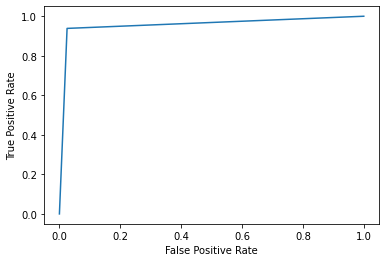

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  pipeline.predict(x_test))

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Cross Validation Fold

In [20]:
k_fold = KFold(n_splits=6)
scores = []
confusion = np.array([[0, 0], [0, 0]])
for train_indices, test_indices in k_fold.split(data):
    train_text = data.iloc[train_indices]['text'].values
    train_y = data.iloc[train_indices]['label'].values

    test_text = data.iloc[test_indices]['text'].values
    test_y = data.iloc[test_indices]['label'].values

    pipeline.fit(train_text, train_y)
    predictions = pipeline.predict(test_text)

    confusion += confusion_matrix(test_y, predictions)
    score = f1_score(test_y, predictions, pos_label='spam')
    scores.append(score)

print('Total emails classified:', len(data))
print('Score:', sum(scores)/len(scores))
print('Confusion matrix:')
print(confusion)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Total emails classified: 5171
Score: 0.9473326820760332
Confusion matrix:
[[3577   95]
 [  65 1434]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
